Analysis of partition datasets in route ../dataset/partitions
Target: averaged_queue_time_per_job

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Analysis of medium partition

In [2]:
medium_df = pd.read_csv("../dataset/partitions/medium_partition.csv")
medium_df.describe().transpose()

count          mean            std   
date                                  2907.0  1.681567e+09  264503.978524  \
availability                          2907.0  1.000000e+00       0.000000   
avg_alloc_mem                         2907.0  1.204111e+05   17483.228132   
avg_allocated_cpus_per_job            2907.0  7.533300e+02     148.429907   
avg_allocated_nodes_per_job           2907.0  2.942695e+00       0.579804   
avg_cpus_load_lower                   2907.0  4.542350e+01      17.404582   
avg_cpus_load_upper                   2907.0  1.319634e+02      52.804867   
avg_execution_time_per_job            2907.0  5.374966e+04   12526.187749   
avg_free_mem_lower                    2907.0  1.750444e+05   16502.883473   
avg_free_mem_upper                    2907.0  2.295526e+05    9153.499389   
avg_job_size_lower                    2907.0  1.000000e+00       0.000000   
avg_job_size_upper                    2907.0  2.000000e+01       0.000000   
avg_maximum_allocated_cpus_per_job    2907.0  6.419306e+02     103.553341   
avg_maximum_allocated_nodes_per_job   2907.0  2.942695e+00       0.579804   
avg_memory                            2907.0  2.400000e+05       0.000000   
avg_minimum_requested_cpus_per_job    2907.0  1.142007e+02      12.391759   
avg_minimum_requested_memory_per_job  2907.0  2.288335e+05   16755.996959   
avg_minimum_requested_nodes_per_job   2907.0  3.286025e+00       0.545538   
avg_pending_jobs                      2907.0  1.598222e+02     108.910094   
avg_queue_time_per_job                2907.0  8.575696e+04   53882.438605   
avg_requested_cpus_per_job            2907.0  4.227308e+02      84.965856   
avg_running_jobs                      2907.0  3.257692e+02      94.998656   
avg_time_left_per_job                 2907.0  7.541854e+04   10587.368908   
avg_time_limit                        2907.0  1.296000e+05       0.000000   
cores                                 2907.0  1.600000e+01       0.000000   
cpus                                  2907.0  2.560000e+02       0.000000   
node_alloc                            2907.0  1.045764e+03     331.592601   
node_idle                             2907.0  2.985033e+02     317.054055   
node_other                            2907.0  0.000000e+00       0.000000   
node_total                            2907.0  1.344268e+03      33.298757   
nodes                                 2907.0  1.344268e+03      33.298757   

                                               min           25%   
date                                  1.681117e+09  1.681341e+09  \
availability                          1.000000e+00  1.000000e+00   
avg_alloc_mem                         7.697429e+04  1.059050e+05   
avg_allocated_cpus_per_job            4.410237e+02  6.230638e+02   
avg_allocated_nodes_per_job           1.722749e+00  2.433843e+00   
avg_cpus_load_lower                   0.000000e+00  3.328000e+01   
avg_cpus_load_upper                   5.994000e+01  9.718000e+01   
avg_execution_time_per_job            2.114197e+04  4.410989e+04   
avg_free_mem_lower                    7.312750e+04  1.661032e+05   
avg_free_mem_upper                    1.927495e+05  2.228622e+05   
avg_job_size_lower                    1.000000e+00  1.000000e+00   
avg_job_size_upper                    2.000000e+01  2.000000e+01   
avg_maximum_allocated_cpus_per_job    3.976657e+02  5.579487e+02   
avg_maximum_allocated_nodes_per_job   1.722749e+00  2.433843e+00   
avg_memory                            2.400000e+05  2.400000e+05   
avg_minimum_requested_cpus_per_job    6.979545e+01  1.060235e+02   
avg_minimum_requested_memory_per_job  1.304243e+05  2.323674e+05   
avg_minimum_requested_nodes_per_job   1.969163e+00  2.896552e+00   
avg_pending_jobs                      1.300000e+01  7.700000e+01   
avg_queue_time_per_job                1.835158e+04  5.283481e+04   
avg_requested_cpus_per_job            2.142069e+02  3.704242e+02   
avg_running_jobs                      5.900000e+01  2.650000e+02   
avg_time_l

In [3]:
medium_df.shape

(2907, 31)

Data preprocessing
1- convert date to time index
2- remove features with no variance
3- detect null values
4- Histograms for feature value distribution
5- Detection of outliers
6- Correlation between features
7- Dimensionality reduction
8- Feature selection



In [3]:
# 1- convert date to time index
medium_df['date'] = pd.to_datetime(medium_df['date'].astype(np.int64), unit='s') 
medium_df.set_index('date', inplace=True)
# 2- remove features with no variance
filter = medium_df.std() == 0
features_to_drop = medium_df.columns[filter]
medium_df.drop(features_to_drop, axis=1, inplace=True)
medium_df.describe().transpose()  

count           mean           std   
avg_alloc_mem                         2907.0  120411.057794  17483.228132  \
avg_allocated_cpus_per_job            2907.0     753.330036    148.429907   
avg_allocated_nodes_per_job           2907.0       2.942695      0.579804   
avg_cpus_load_lower                   2907.0      45.423498     17.404582   
avg_cpus_load_upper                   2907.0     131.963401     52.804867   
avg_execution_time_per_job            2907.0   53749.655102  12526.187749   
avg_free_mem_lower                    2907.0  175044.364796  16502.883473   
avg_free_mem_upper                    2907.0  229552.567433   9153.499389   
avg_maximum_allocated_cpus_per_job    2907.0     641.930566    103.553341   
avg_maximum_allocated_nodes_per_job   2907.0       2.942695      0.579804   
avg_minimum_requested_cpus_per_job    2907.0     114.200666     12.391759   
avg_minimum_requested_memory_per_job  2907.0  228833.477187  16755.996959   
avg_minimum_requested_nodes_per_job   2907.0       3.286025      0.545538   
avg_pending_jobs                      2907.0     159.822153    108.910094   
avg_queue_time_per_job                2907.0   85756.957616  53882.438605   
avg_requested_cpus_per_job            2907.0     422.730789     84.965856   
avg_running_jobs                      2907.0     325.769178     94.998656   
avg_time_left_per_job                 2907.0   75418.541624  10587.368908   
node_alloc                            2907.0    1045.764362    331.592601   
node_idle                             2907.0     298.503268    317.054055   
node_total                            2907.0    1344.267630     33.298757   
nodes                                 2907.0    1344.267630     33.298757   

                                                min            25%   
avg_alloc_mem                          76974.285714  105905.000000  \
avg_allocated_cpus_per_job               441.023697     623.063785   
avg_allocated_nodes_per_job                1.722749       2.433843   
avg_cpus_load_lower                        0.000000      33.280000   
avg_cpus_load_upper                       59.940000      97.180000   
avg_execution_time_per_job             21141.968944   44109.890100   
avg_free_mem_lower                     73127.500000  166103.166667   
avg_free_mem_upper                    192749.500000  222862.166667   
avg_maximum_allocated_cpus_per_job       397.665653     557.948718   
avg_maximum_allocated_nodes_per_job        1.722749       2.433843   
avg_minimum_requested_cpus_per_job        69.795455     106.023517   
avg_minimum_requested_memory_per_job  130424.316109  232367.384735   
avg_minimum_requested_nodes_per_job        1.969163       2.896552   
avg_pending_jobs                          13.000000      77.000000   
avg_queue_time_per_job                 18351.582763   52834.807103   
avg_requested_cpus_per_job               214.206897     370.424242   
avg_running_jobs                          59.000000     265.000000   
avg_time_left_per_job                  45840.279152   68121.493387   
node_alloc                               299.000000     785.000000   
node_idle                                  0.000000       0.000000   
node_total                              1230.000000    1351.000000   
nodes                                   1230.000000    1351.000000   

                                                50%            75%   
avg_alloc_mem                         119440.000000  135490.285714  \
avg_allocated_cpus_per_job               747.736148     861.971851   
avg_allocated_nodes_per_job                2.920844       3.367078   
avg_cpus_load_lower                       44.053333      57.070286   
avg_cpus_load_upper                      113.390000     148.553333   
avg_execution_time_per_job             53477.244980   63027.162126   
avg_free_mem_lower                    178548.833333  185758.857143   
avg_free_mem_upper                    229042.000000  237568.214286   
avg_maximum_allocated_cpus

In [6]:
# 3- detect null values
medium_df.isnull().mean() # Non negative values gives the % of null values for each feature

avg_alloc_mem                           0.0
avg_allocated_cpus_per_job              0.0
avg_allocated_nodes_per_job             0.0
avg_cpus_load_lower                     0.0
avg_cpus_load_upper                     0.0
avg_execution_time_per_job              0.0
avg_free_mem_lower                      0.0
avg_free_mem_upper                      0.0
avg_maximum_allocated_cpus_per_job      0.0
avg_maximum_allocated_nodes_per_job     0.0
avg_minimum_requested_cpus_per_job      0.0
avg_minimum_requested_memory_per_job    0.0
avg_minimum_requested_nodes_per_job     0.0
avg_pending_jobs                        0.0
avg_queue_time_per_job                  0.0
avg_requested_cpus_per_job              0.0
avg_running_jobs                        0.0
avg_time_left_per_job                   0.0
node_alloc                              0.0
node_idle                               0.0
node_total                              0.0
nodes                                   0.0
dtype: float64

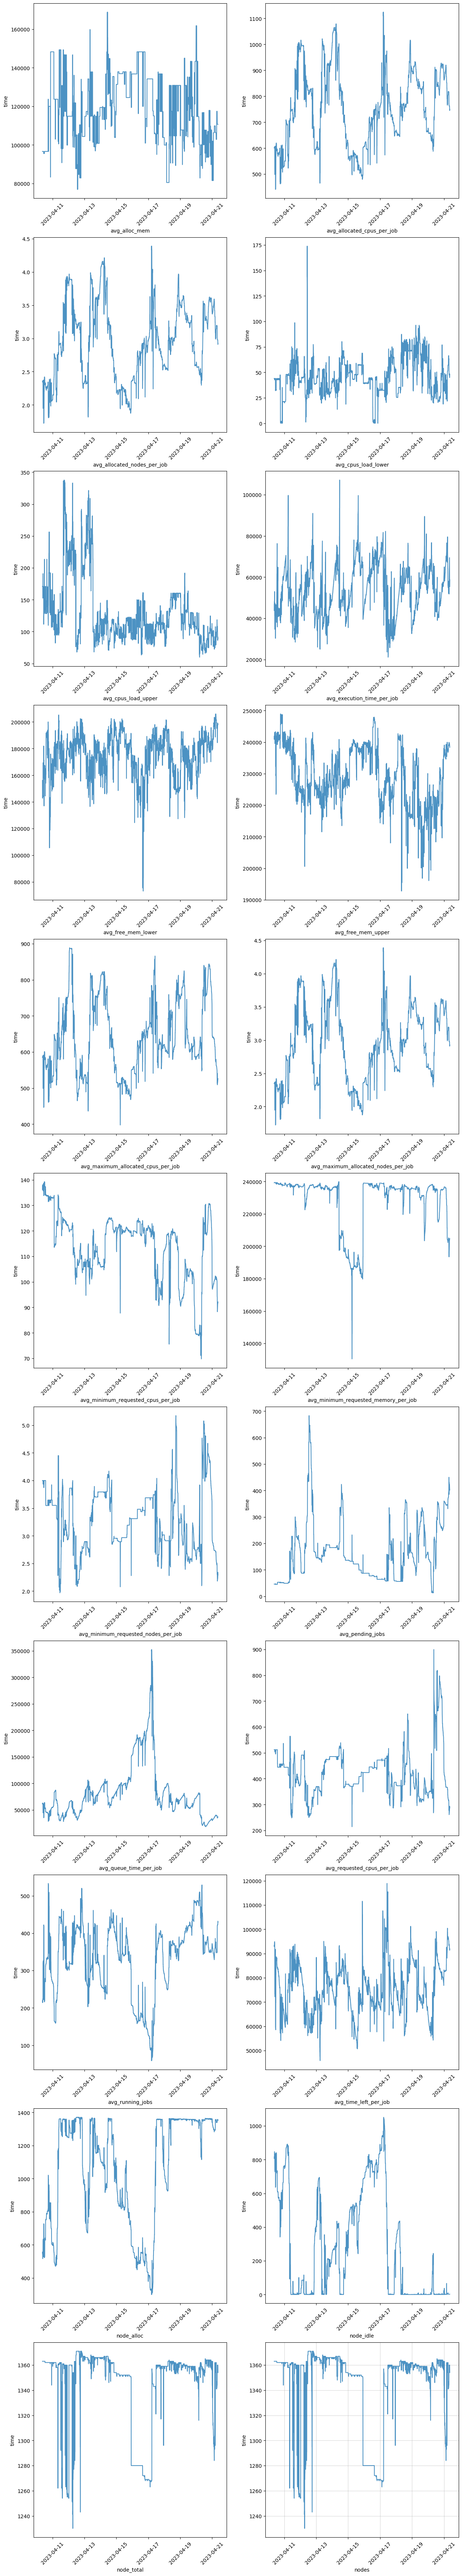

In [7]:
features = medium_df.columns
fig, axes = plt.subplots(11, 2, figsize=(15, 90))
row = 0
col = 0
for feature in medium_df.columns:
    axes[row, col].plot(medium_df.index, medium_df[feature],
        alpha=0.8
    )
    plt.grid(alpha=0.5)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set(xlabel=feature, ylabel='time')
    col = col + 1
    if col % 2 == 0:
        col = 0
        row = row + 1

4- Histograms for feature value distribution

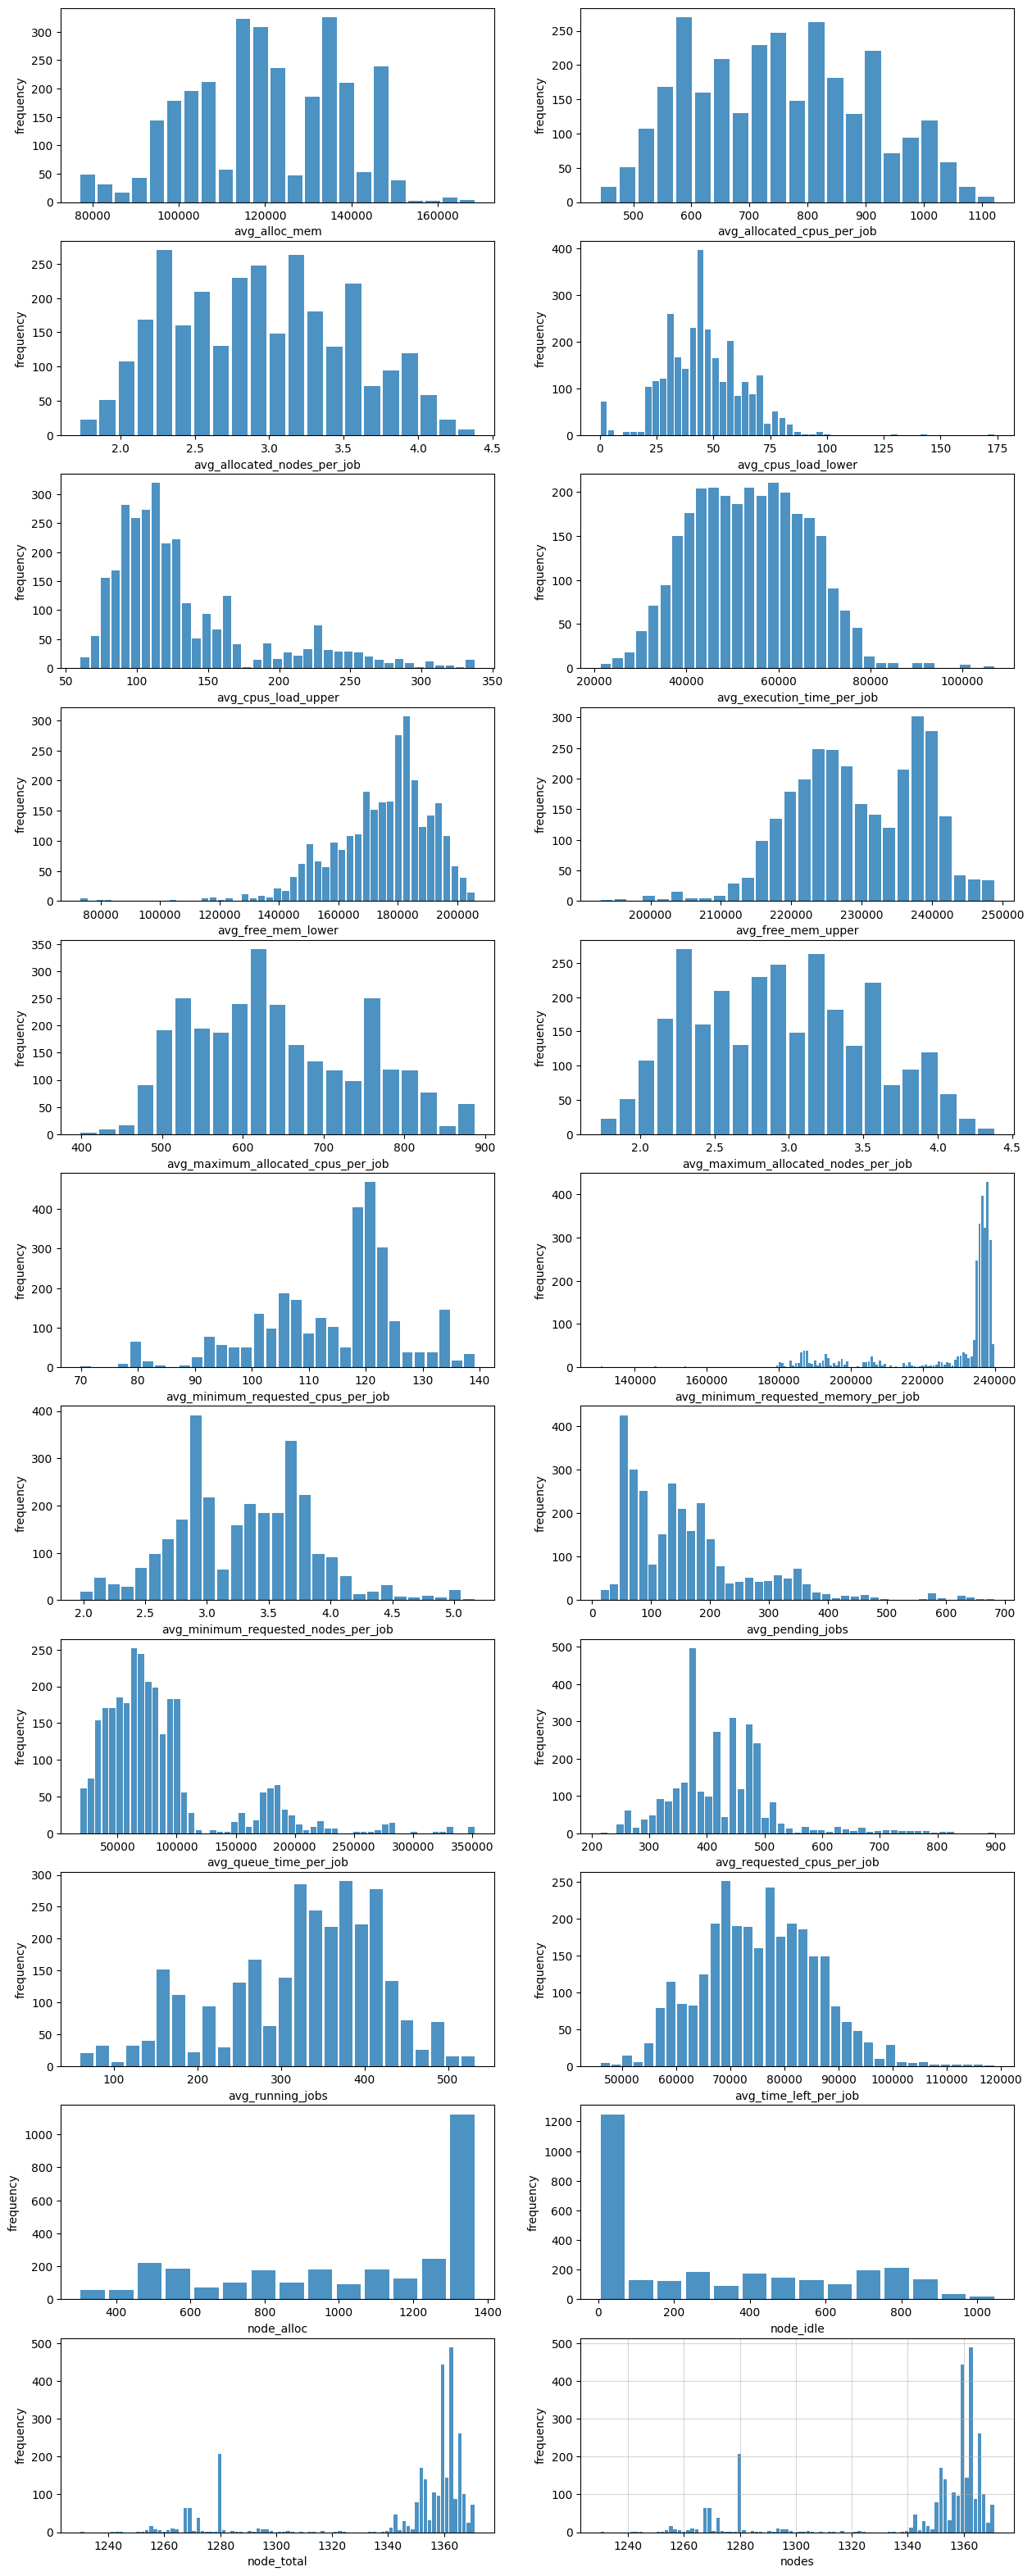

In [8]:
fig, axes = plt.subplots(11, 2, figsize=(15, 40))
row = 0
col = 0
for feature in medium_df.columns:
    n, bins, patches = axes[row, col].hist(
        x=medium_df[feature], bins='auto',
        alpha=0.8, rwidth=0.85
    )
    plt.grid(alpha=0.5)
    axes[row, col].set(xlabel=feature, ylabel='frequency')
    col = col + 1
    if col % 2 == 0:
        col = 0
        row = row + 1

5- Detection of outliers
Analysis of variance distribution of features with boxplot
It looks there are two groups of features, one with low variance, another one with large variance.
It the large variance group, some features shows outliers

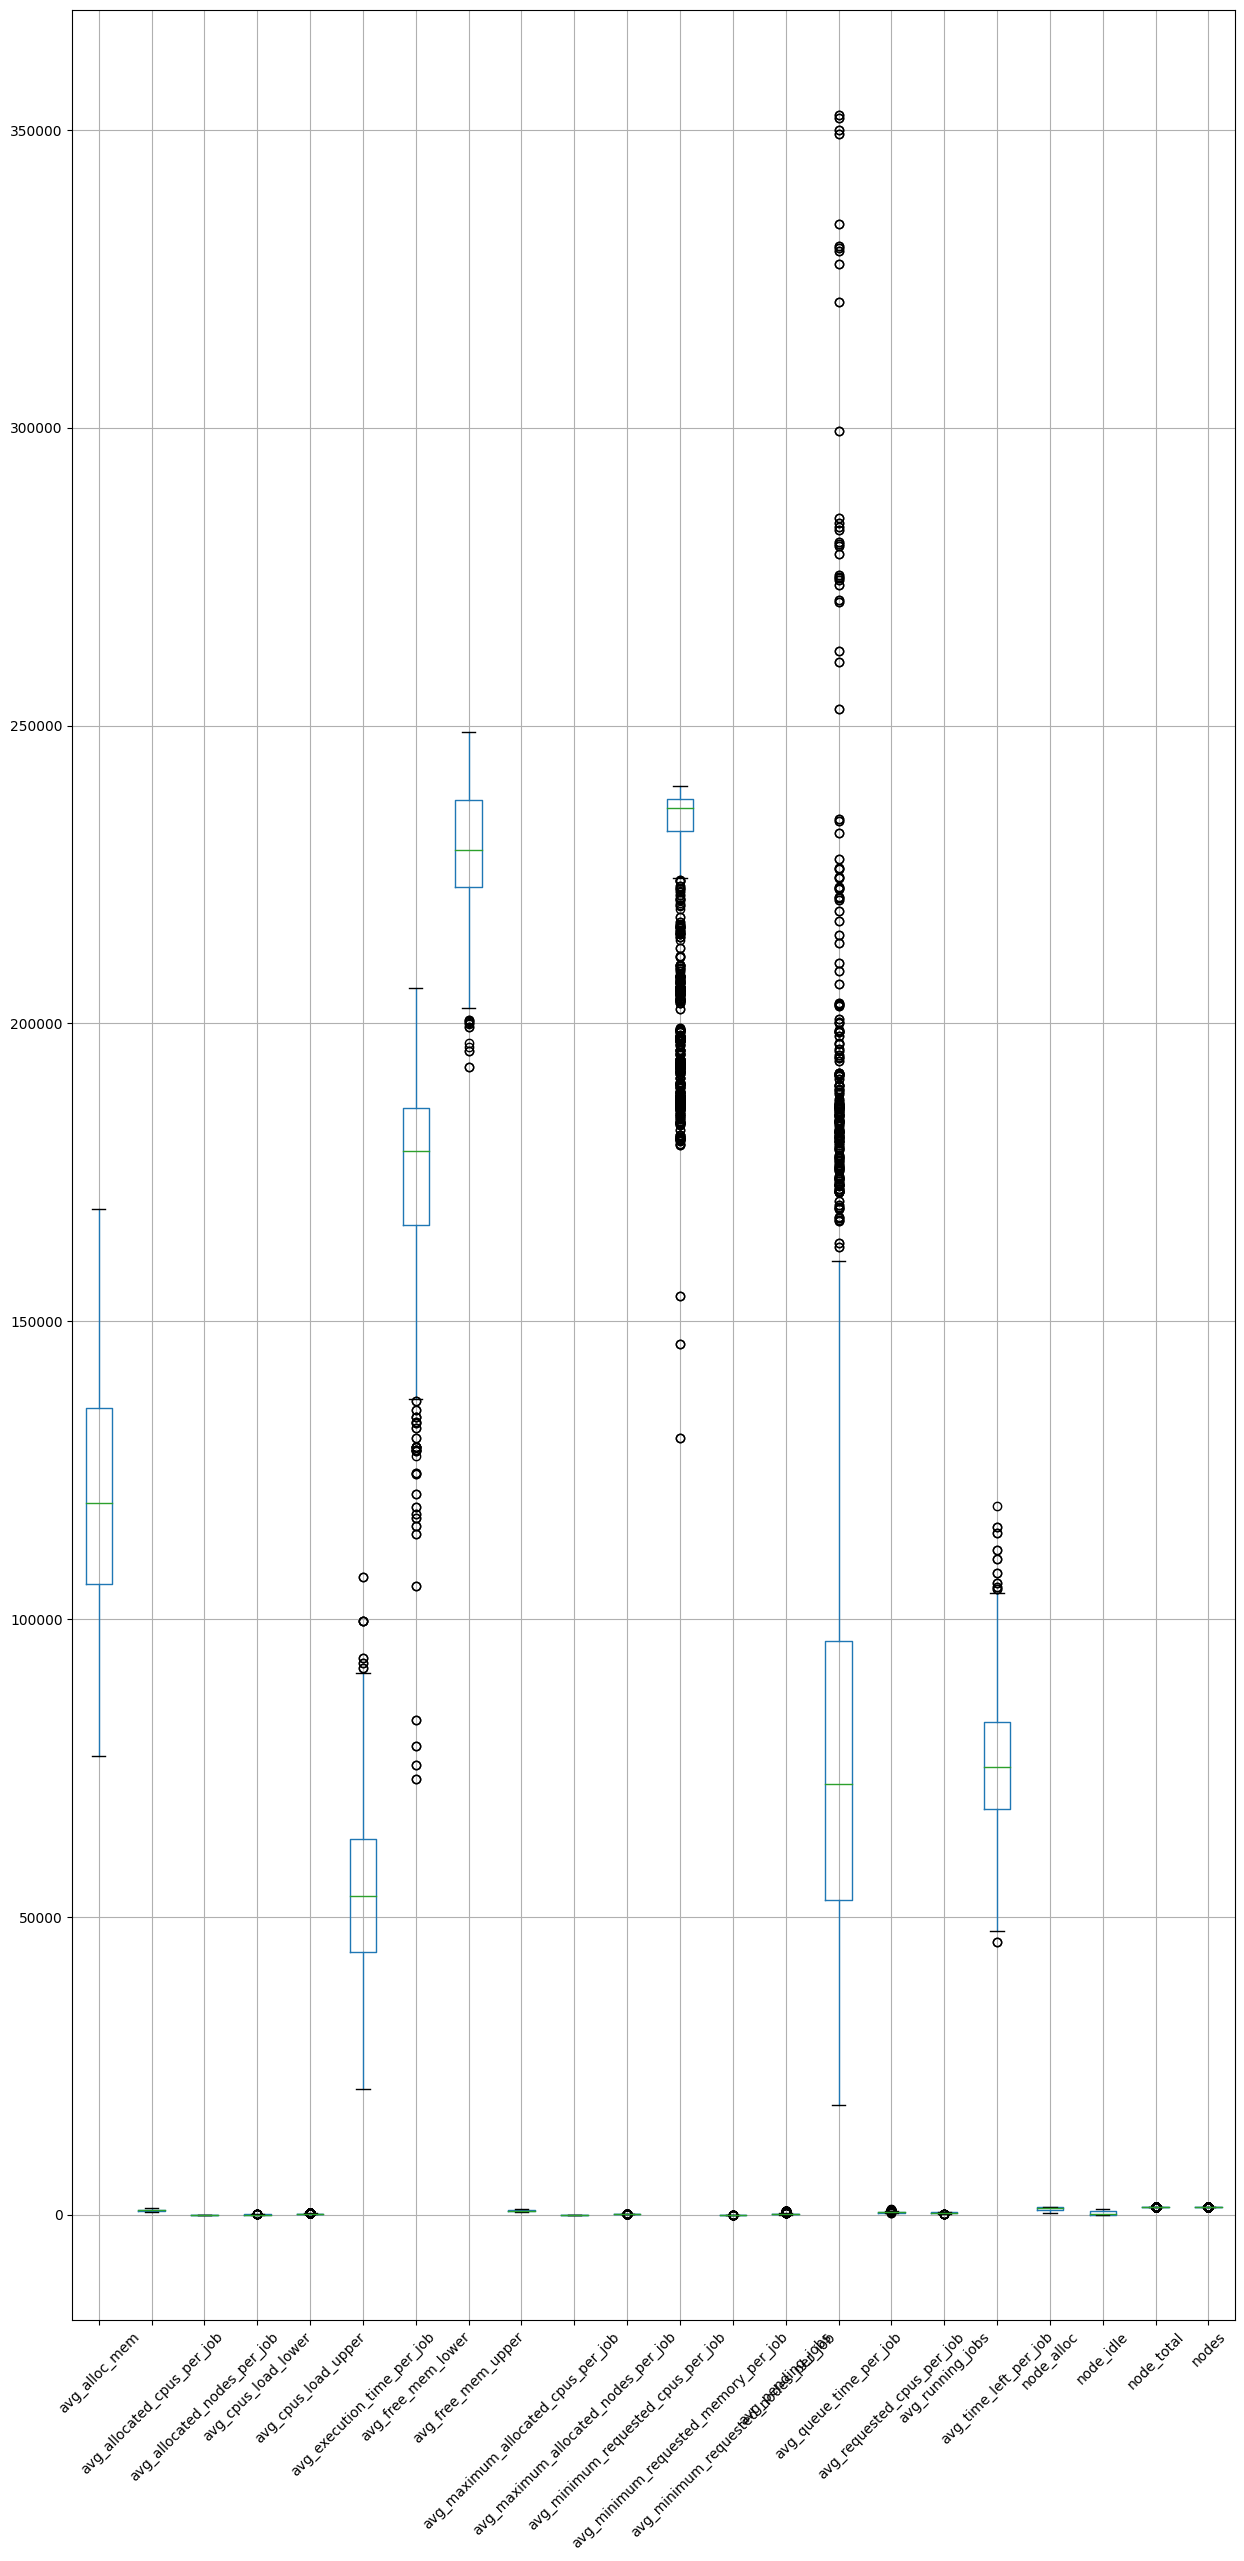

In [9]:
boxes = medium_df.boxplot(return_type='axes', figsize=(15, 30), rot=45)

Univariate outliers detection.
Applied to averaged running jobs

Outliers detection using Z-Scores (3 sigma)


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_medium_df = scaler.fit_transform(medium_df)
outliers_rows, outliers_cols = np.where(np.abs(normalized_medium_df) > 3) # 3-sigma divergence
print (list(zip(outliers_rows, outliers_cols)))

[(125, 6), (126, 6), (127, 6), (128, 6), (129, 6), (130, 6), (137, 6), (138, 6), (139, 6), (140, 6), (251, 5), (252, 5), (253, 5), (254, 5), (363, 3), (364, 3), (371, 4), (372, 4), (373, 4), (374, 4), (384, 4), (385, 4), (386, 4), (387, 4), (388, 4), (389, 4), (390, 4), (391, 4), (392, 4), (393, 4), (394, 4), (395, 4), (396, 4), (397, 4), (400, 4), (401, 4), (404, 4), (405, 4), (406, 4), (407, 4), (536, 4), (536, 20), (536, 21), (537, 4), (537, 20), (537, 21), (538, 20), (538, 21), (539, 20), (539, 21), (540, 20), (540, 21), (541, 20), (541, 21), (542, 7), (543, 7), (585, 3), (586, 3), (587, 3), (588, 3), (589, 3), (611, 13), (612, 13), (613, 13), (614, 13), (615, 13), (616, 13), (617, 13), (618, 13), (619, 13), (620, 13), (621, 13), (622, 13), (623, 13), (624, 13), (625, 13), (626, 13), (627, 13), (628, 13), (629, 13), (630, 13), (631, 13), (632, 13), (633, 13), (634, 13), (635, 13), (636, 13), (637, 13), (638, 13), (639, 13), (640, 13), (641, 13), (642, 13), (643, 13), (644, 13), (64

Multivariate outliers detection

Elliptic Envelope
It requires data has normal distribution. 
TODO: investigate how to check normal distribution of data
TODO: further investigation of this approach for outliers detection is required, how to be applied to dataframes with multiple features, and
how to render outliers. In Python Data Science Essentials book, Elliptic Envelope technique is applied on dataset after PCA analysis for 2 components

In [128]:
normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')].shape

(2907,)

/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-181.447287444853430 > -200.330362643998171). You may want to try with a higher value of support_fraction (current value: 0.505).
  warnings.warn("Determinant has increased; this should not happen: "


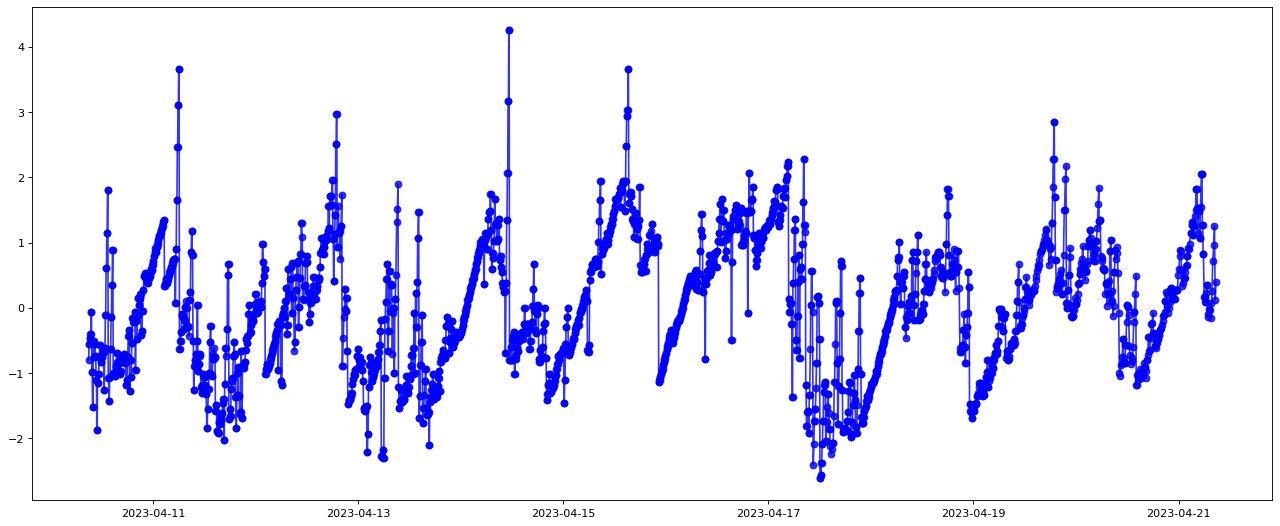

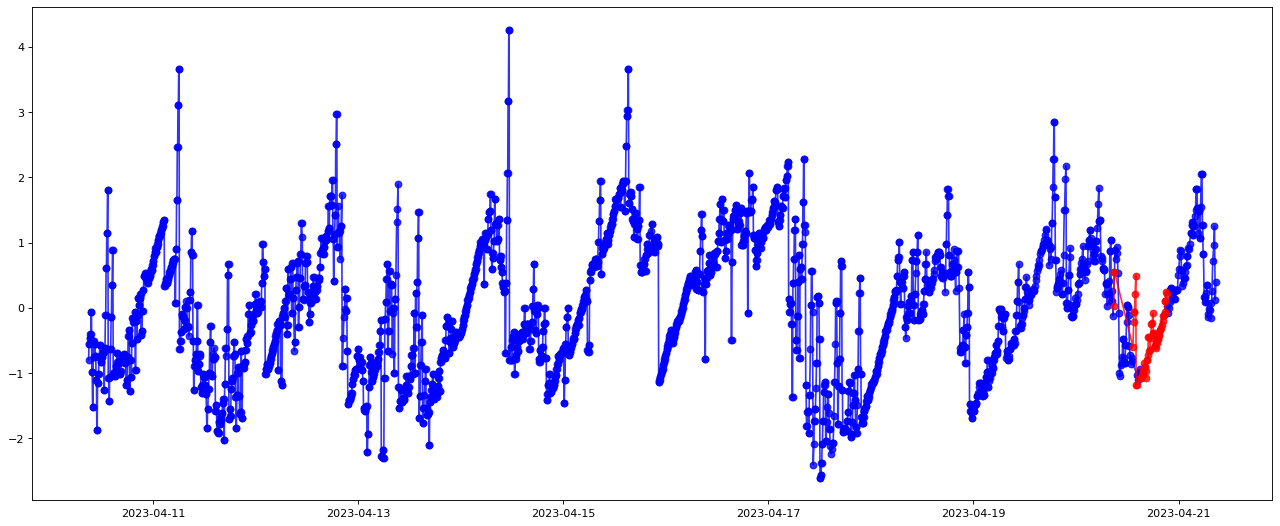

In [129]:
from sklearn.covariance import EllipticEnvelope
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

#Normalize data (required by EllipticEnvelope)
scaler = StandardScaler()
normalized_medium_df = scaler.fit_transform(medium_df)

robust_covariance_estimation = EllipticEnvelope(contamination=0.02).fit(normalized_medium_df)
detection = robust_covariance_estimation.predict(normalized_medium_df)
outliers = np.where(detection == -1)[0]
inliers = np.where(detection == 1)[0]
#Plot data series
figure(figsize=(20, 8), dpi=80)
plt.plot(medium_df.index, normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')], c='blue', alpha=0.8, marker='o')
plt.show()
#Plot outliers/inliers
# The distribution and the outliers
figure(figsize=(20, 8), dpi=80)
in_points = plt.plot(medium_df.index[inliers], normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')][inliers],
    c='blue', alpha=0.8, marker='o')
out_points = plt.plot(medium_df.index[outliers], normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')][outliers],
    c='red', alpha=0.8, marker='o')



PCA decomposition followed by Elliptic Envelope, using code from Python data science essentials book
The presence of clusters in data is not an optimal situation for Elliptic Envelope

/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-178.195323315680326 > -198.398640451399558). You may want to try with a higher value of support_fraction (current value: 0.505).
  warnings.warn("Determinant has increased; this should not happen: "
/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-179.285934521898866 > -208.163078980129285). You may want to try with a higher value of support_fraction (current value: 0.504).
  warnings.warn("Determinant has increased; this shou

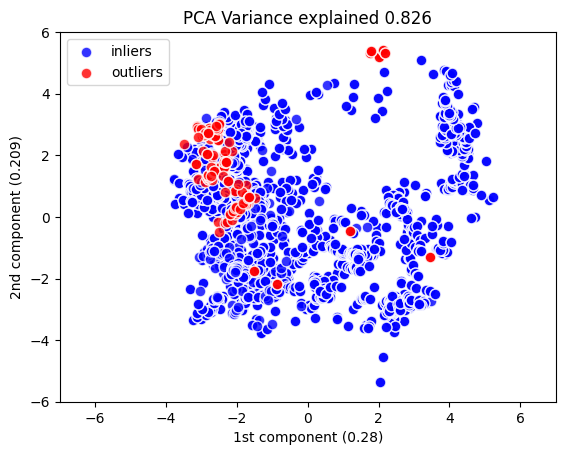

In [132]:
# PCA decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
Zscore_components = pca.fit_transform(normalized_medium_df)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))
v1 = str(round(pca.explained_variance_ratio_[0],3))
v2 = str(round(pca.explained_variance_ratio_[1],3))

robust_covariance_est = EllipticEnvelope(store_precision=False, assume_centered = False, contamination=.05)
robust_covariance_est.fit(normalized_medium_df)
detection = robust_covariance_est.predict(normalized_medium_df)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

in_points = plt.scatter(Zscore_components[regular,0], Zscore_components[regular,1], c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
out_points = plt.scatter(Zscore_components[outliers,0], Zscore_components[outliers,1], c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.legend((in_points,out_points),('inliers','outliers'), scatterpoints=1, loc='best')
plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')
plt.xlim([-7,7])
plt.ylim([-6,6])
plt.title(vtot)
plt.show()

OneClassSVM

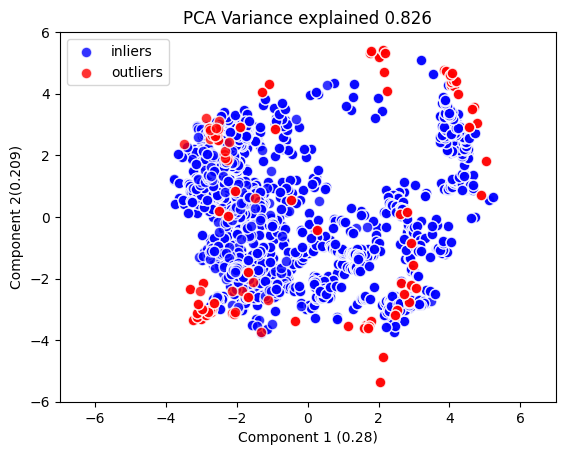

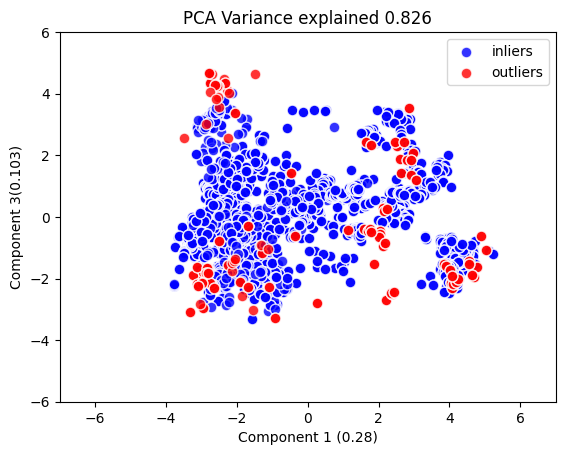

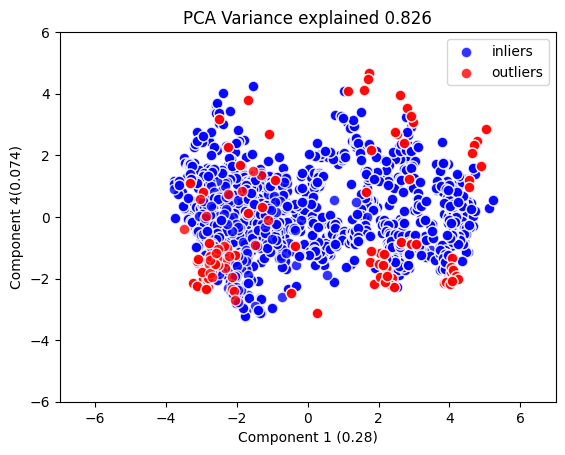

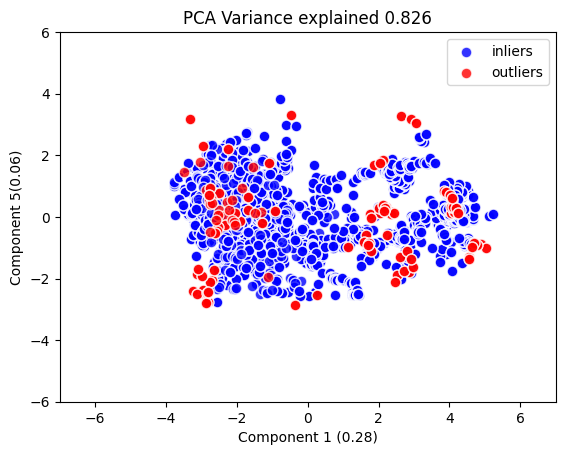

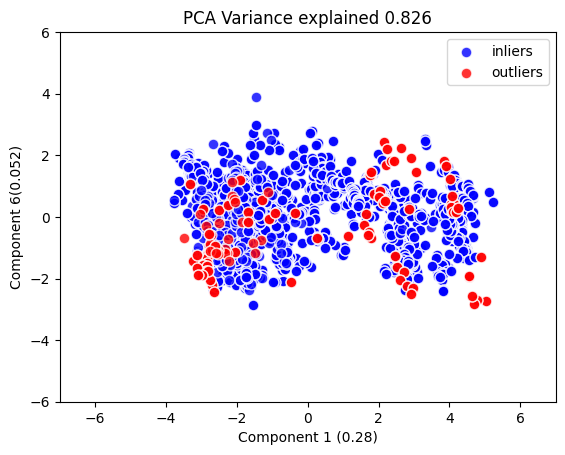

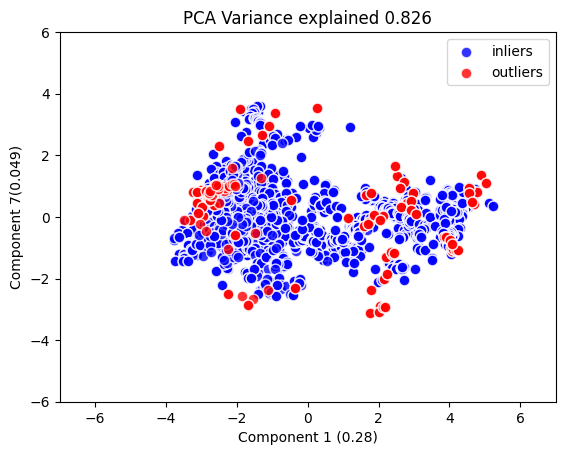

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

#Normalize data (required by OneClassSVM)
scaler = StandardScaler()
normalized_medium_df = scaler.fit_transform(medium_df)

# PCA decomposition
pca = PCA(n_components=7)
Zscore_components = pca.fit_transform(normalized_medium_df)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))

# OneClassSVM fitting and estimates
outliers_fraction = 0.02
nu_estimate = 0.95 * outliers_fraction + 0.05
gamma_estimate=1.0/len(normalized_medium_df)

oneclasssvm = OneClassSVM(kernel="rbf", gamma=gamma_estimate, degree=3, nu=nu_estimate)
oneclasssvm.fit(normalized_medium_df)
detection = oneclasssvm.predict(normalized_medium_df)
outliers = np.where(detection == -1)
regular = np.where(detection == 1)

# Visualization of data and outliers
for r in range(1,7):
    in_points = plt.scatter(Zscore_components[regular,0], Zscore_components[regular,r],
        c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
    out_points = plt.scatter(Zscore_components[outliers,0], Zscore_components[outliers,r],
        c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
    plt.legend((in_points,out_points),('inliers','outliers'), scatterpoints=1, loc='best')
    plt.xlabel('Component 1 (' + str(round(pca.explained_variance_ratio_[0],3))+')')
    plt.ylabel('Component '+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r],3))+')')
    plt.xlim([-7,7])
    plt.ylim([-6,6])
    plt.title(vtot)
    plt.show()


6- Correlation between features
Correlation matrix computed by pandas

[Text(0, 0, 'avg_alloc_mem'),
 Text(0, 1, 'avg_allocated_cpus_per_job'),
 Text(0, 2, 'avg_allocated_nodes_per_job'),
 Text(0, 3, 'avg_cpus_load_lower'),
 Text(0, 4, 'avg_cpus_load_upper'),
 Text(0, 5, 'avg_execution_time_per_job'),
 Text(0, 6, 'avg_free_mem_lower'),
 Text(0, 7, 'avg_free_mem_upper'),
 Text(0, 8, 'avg_maximum_allocated_cpus_per_job'),
 Text(0, 9, 'avg_maximum_allocated_nodes_per_job'),
 Text(0, 10, 'avg_minimum_requested_cpus_per_job'),
 Text(0, 11, 'avg_minimum_requested_memory_per_job'),
 Text(0, 12, 'avg_minimum_requested_nodes_per_job'),
 Text(0, 13, 'avg_pending_jobs'),
 Text(0, 14, 'avg_queue_time_per_job'),
 Text(0, 15, 'avg_requested_cpus_per_job'),
 Text(0, 16, 'avg_running_jobs'),
 Text(0, 17, 'avg_time_left_per_job'),
 Text(0, 18, 'node_alloc'),
 Text(0, 19, 'node_idle'),
 Text(0, 20, 'node_total'),
 Text(0, 21, 'nodes')]

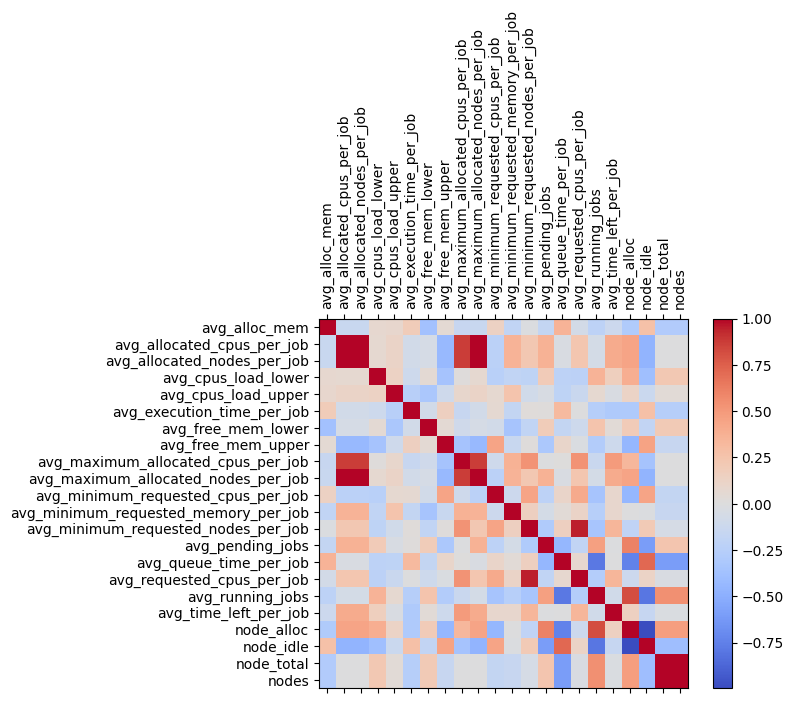

In [10]:
correlation_matrix = medium_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cmf = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cmf)
plt.xticks(rotation=90)
xaxis = np.arange(len(features))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(features)
ax.set_yticklabels(features)

Correlation matrix computed by numpy (covariance matrix, Pearson)

[Text(0, 0, 'avg_alloc_mem'),
 Text(0, 1, 'avg_allocated_cpus_per_job'),
 Text(0, 2, 'avg_allocated_nodes_per_job'),
 Text(0, 3, 'avg_cpus_load_lower'),
 Text(0, 4, 'avg_cpus_load_upper'),
 Text(0, 5, 'avg_execution_time_per_job'),
 Text(0, 6, 'avg_free_mem_lower'),
 Text(0, 7, 'avg_free_mem_upper'),
 Text(0, 8, 'avg_maximum_allocated_cpus_per_job'),
 Text(0, 9, 'avg_maximum_allocated_nodes_per_job'),
 Text(0, 10, 'avg_minimum_requested_cpus_per_job'),
 Text(0, 11, 'avg_minimum_requested_memory_per_job'),
 Text(0, 12, 'avg_minimum_requested_nodes_per_job'),
 Text(0, 13, 'avg_pending_jobs'),
 Text(0, 14, 'avg_queue_time_per_job'),
 Text(0, 15, 'avg_requested_cpus_per_job'),
 Text(0, 16, 'avg_running_jobs'),
 Text(0, 17, 'avg_time_left_per_job'),
 Text(0, 18, 'node_alloc'),
 Text(0, 19, 'node_idle'),
 Text(0, 20, 'node_total'),
 Text(0, 21, 'nodes')]

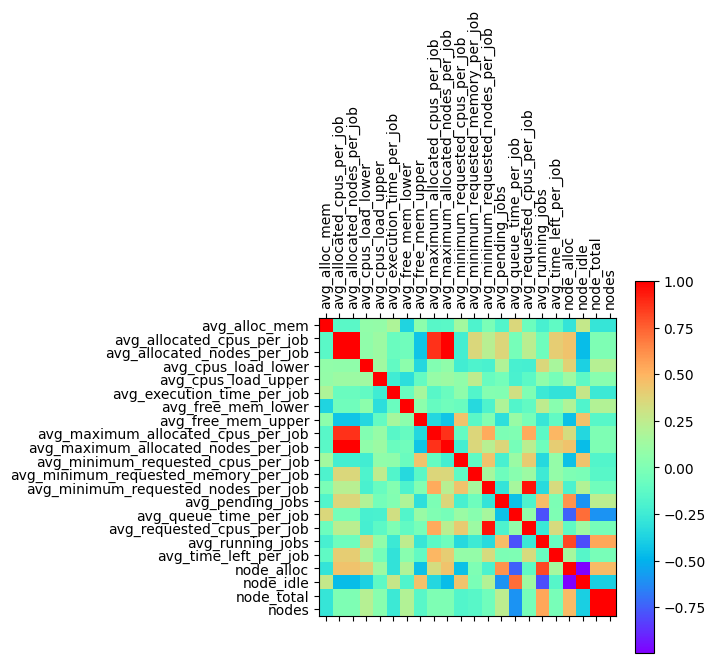

In [11]:
cov_data = np.corrcoef(medium_df.T)
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
fig.colorbar(img)
#plt.xticks(rotation=90)
#fig.autofmt_xdate(rotation=45)
xaxis = np.arange(len(features))
img.axes.set_xticks(xaxis)
img.axes.set_yticks(xaxis)
img.axes.set_xticklabels(features, rotation = 90)
img.axes.set_yticklabels(features)

7- Dimensionality reduction
Target: averaged_queue_time_per_job

PCA: Principal component analysis

In [12]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(medium_df)
X_pca_2c.shape

(2907, 2)

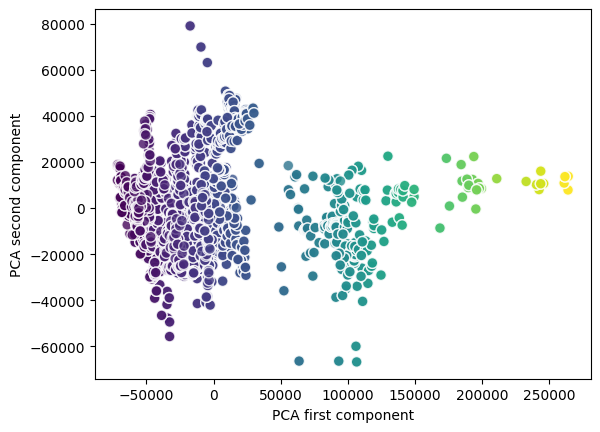

0.8135163784565945

In [13]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("PCA first component")
plt.ylabel("PCA second component")
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [14]:
pca_3c = PCA(n_components=3)
X_pca_3c = pca_3c.fit_transform(medium_df)
X_pca_3c.shape

(2907, 3)

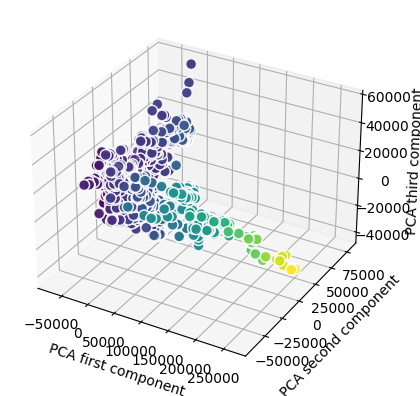

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3c[:,0], X_pca_3c[:,1], X_pca_3c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()

In above 2D and 3D scatter plots we can see how the average job queue_time mostly scales with the first PCA component

We can determine the optimal number of principal components. With n=6 we get 0.98 of total variance, with n=7, the 0.9999

First computation, iterating over an increasing number of components (up to the number of features)

In [16]:
for n in range(1,len(features)):
    pca_nc = PCA(n_components=n)
    X_pca_nc = pca_nc.fit_transform(medium_df)
    print ('n={}, variance_ratio_sum: {}'.format(n, pca_nc.explained_variance_ratio_.sum()))

n=1, variance_ratio_sum: 0.7228795341705985
n=2, variance_ratio_sum: 0.813516378456595
n=3, variance_ratio_sum: 0.895786328591874
n=4, variance_ratio_sum: 0.9349982717491834
n=5, variance_ratio_sum: 0.9613744153076306
n=6, variance_ratio_sum: 0.9811910641038721
n=7, variance_ratio_sum: 0.9999751890526739
n=8, variance_ratio_sum: 0.9999923540634528
n=9, variance_ratio_sum: 0.9999957910581312
n=10, variance_ratio_sum: 0.9999978072097726
n=11, variance_ratio_sum: 0.9999989090332625
n=12, variance_ratio_sum: 0.9999993737451552
n=13, variance_ratio_sum: 0.9999997388119546
n=14, variance_ratio_sum: 0.9999999088257066
n=15, variance_ratio_sum: 0.9999999536261739
n=16, variance_ratio_sum: 0.999999984262274
n=17, variance_ratio_sum: 0.9999999999946779
n=18, variance_ratio_sum: 1.0000000000000002
n=19, variance_ratio_sum: 1.0000000000000002
n=20, variance_ratio_sum: 1.0000000000000002
n=21, variance_ratio_sum: 1.0000000000000002


Second computation, requesting to obtain 0.99 total variance
Similarly, it determines 7 pca components as optimal

In [17]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(medium_df)
pca.explained_variance_ratio_.sum(), X_pca.shape

(0.9999751890526745, (2907, 7))

Third computation uses a randomized SVD algorithm, intended to speed up computation on large dataset
Similar results are obtained, but much faster for large datasets

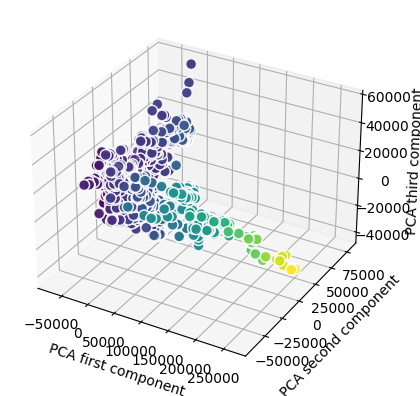

(0.9999751890526745, (2907, 7))

In [18]:
pca_7c = PCA(svd_solver='randomized', n_components=7)
X_pca_7c = pca_7c.fit_transform(medium_df)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_7c[:,0], X_pca_7c[:,1], X_pca_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()
pca.explained_variance_ratio_.sum(), X_pca_7c.shape

LFA: Latent factor analysis
Obtain another non-orthogonal proyection of features to reduce dimensionality 

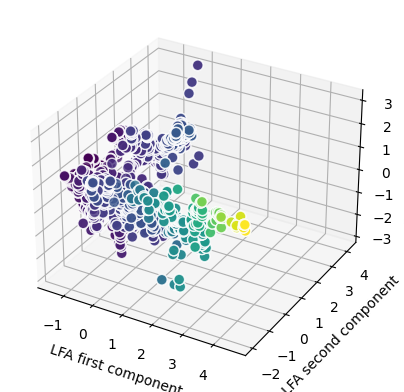

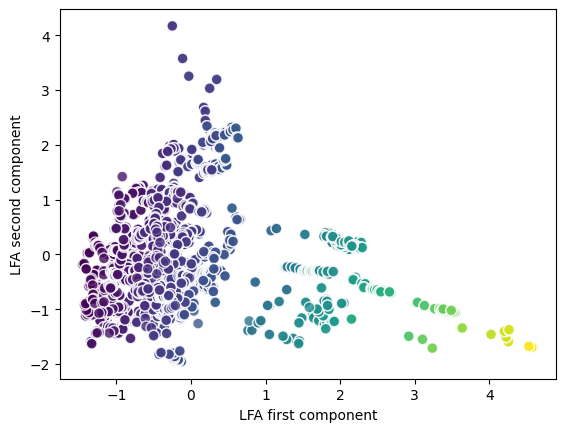

In [76]:
from sklearn.decomposition import FactorAnalysis
fa_7c = FactorAnalysis(n_components=7)
X_fa_7c = fa_7c.fit_transform(medium_df)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_fa_7c[:,0], X_fa_7c[:,1], X_fa_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('LFA first component')
ax.set_ylabel('LFA second component')
ax.set_zlabel('LFA third component')
plt.show()

plt.scatter(X_fa_7c[:,0], X_fa_7c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("LFA first component")
plt.ylabel("LFA second component")
plt.show()

Linear Discriminant Analysys
It requires categorical labels. Target average queue time is convert into categorical by using pandas cut and 10 bin to distribute target data.

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import math
X_features = features.drop('avg_queue_time_per_job')
target = features == 'avg_queue_time_per_job'
y_features = features[target]
X = medium_df[X_features].to_numpy()
y = medium_df[y_features]
step = math.floor((y.max() - y.min())/10)
bins = range(math.floor(y.min()), math.ceil(y.max()), step)
y = pd.cut(x=medium_df[y_features].to_numpy().flatten(), bins=bins, labels=range(10))
y = y.fillna(method='pad')
lda_7c = LDA(n_components=7)
X_lda_7c = lda_7c.fit_transform(X, y)

/tmp/ipykernel_22590/3446104444.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  step = math.floor((y.max() - y.min())/10)
/tmp/ipykernel_22590/3446104444.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bins = range(math.floor(y.min()), math.ceil(y.max()), step)


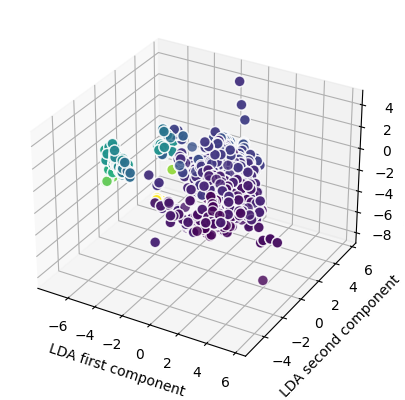

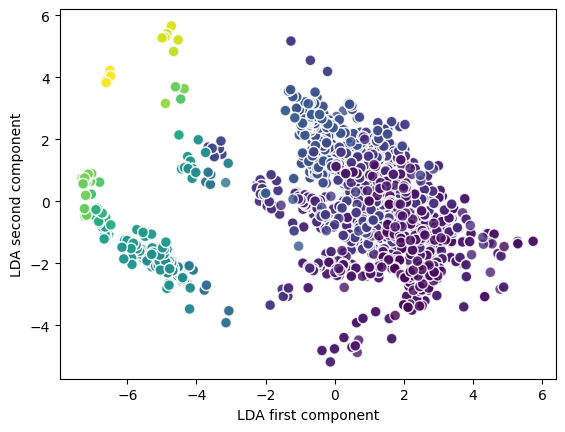

In [75]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lda_7c[:,0], X_lda_7c[:,1], X_lda_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('LDA first component')
ax.set_ylabel('LDA second component')
ax.set_zlabel('LDA third component')
plt.show()

plt.scatter(X_lda_7c[:,0], X_lda_7c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("LDA first component")
plt.ylabel("LDA second component")
plt.show()

T-distributed stochastic neighbor embedding (T-SNE)

In [72]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=3).fit_transform(medium_df)

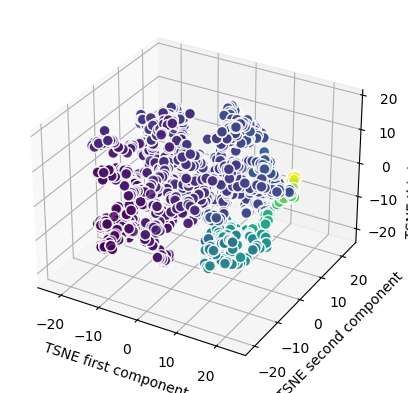

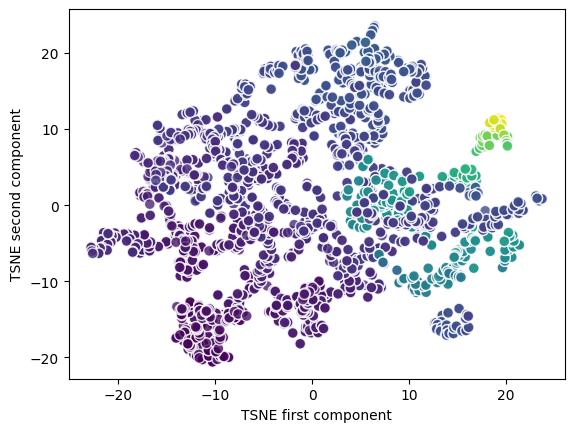

In [74]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('TSNE first component')
ax.set_ylabel('TSNE second component')
ax.set_zlabel('TSNE third component')
plt.show()

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("TSNE first component")
plt.ylabel("TSNE second component")
plt.show()

8- Feature selection

- Selection based on the variance
- Univariate selection
- Recursive elimination
- Randomized logistic regression/stability selection (deprecated)
- L1-based feature selection (deprecated)

TODO: investigate feature seleccion methods


- Selection based on the variance
It removes all the features which have small variance

In [169]:
from sklearn.feature_selection import VarianceThreshold
medium_df_selected = VarianceThreshold(threshold=1.0).fit_transform(medium_df)
# medium_df.describe().transpose()
# These columns should have been removed from dataset: avg_allocated_nodes_per_job, avg_maximum_allocated_nodes_per_job, avg_minimum_requested_nodes_per_job

In [173]:
def determine_dropped_colums(df: pd.core.frame.DataFrame, df_selected: np.ndarray):
    original_columns = df.columns
    dropped_columns = []
    index = -1
    for value in df.iloc[0]:
        index += 1
        if value not in df_selected[0]:
            dropped_columns.append(original_columns[index])
    return dropped_columns

dropped_columns = determine_dropped_colums(medium_df, medium_df_selected)
dropped_columns

['avg_allocated_nodes_per_job',
 'avg_maximum_allocated_nodes_per_job',
 'avg_minimum_requested_nodes_per_job']

- Univariate selection
selects single variables that are associated the most with your target variable according to a statistical test.
There are three available tests:
- The f_regression object uses an F-test and a p-value according to the ratio of explained variance against the unexplained one in a linear regression of the variable with the target. This is only useful for regression problems.
- The f_classif object is an ANOVA F test that can be used when dealing with classification problems.
- The Chi2 object is a chi-squared test, which is suitable when the target is a classification and the variables are count or binary data (they should be positive).
All of the tests have a score and a p-value. Higher scores and p-values indicate that the variable is associated and is consequently useful to the target.
In order to automate the procedure, there are also some selection routines available:
- SelectKBest, based on the score of the test, takes the k best variables.
- SelectPercentile, based on the score of the test, takes the top percentile of performing variables.
- Based on the p-values of the tests, SelectFpr (false positive rate test), SelectFdr (false discovery rate test), and SelectFwe (family-wise error rate procedure).

Using SelectPercentile with f_regression, we determine the top 25% features on forecasting with regression the "avg_queue_time_per_job" target
Selected features are: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'

In [4]:
from sklearn.feature_selection import SelectPercentile, f_regression

X_columns = medium_df.columns.drop("avg_queue_time_per_job")
X = medium_df[X_columns]
y = medium_df["avg_queue_time_per_job"]

selector_f_regression = SelectPercentile(f_regression, percentile=25).fit(X, y)
selected = selector_f_regression.get_support()
print ("Selected features: ")
print (X.columns[selected])


Selected features: 
Index(['avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'], dtype='object')


- Recursive elimination (Recursive Feature Elimination and Cross-Validated selection)
The problem with univariate selection is the likelihood of selecting a subset containing
redundant information. In this case, recursive elimination could help

As a rule, when you notice a large discrepancy between the training results (based on cross-
validation, not the in-sample score) and the out-of-sample results, recursive selection can
help you achieve better performance from your learning algorithms by pointing out some
of the most important variables

TODO: further investigate this technique once concrete regression models are decided.

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
selector = RFECV(estimator=regressor, step=1, cv=10, scoring='r2')
selector.fit(X, y)
print('Optimal number of features: %d' % selector.n_features_)

Optimal number of features: 1


- Randomized logistic regression/stability selection (deprecated, not available anymore in sklearn)

Using Lasso regressor
TODO: Investigate Lasso regressor as a feature selection method




In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regressor = Lasso(alpha=0.3, normalize=True)
regressor.fit(X_train, y_train)
print ('Out-of-sample accuracy: %0.3f' %regressor.score(X_test, y_test))

Out-of-sample accuracy: 0.823
